## COVID Tracking and comparing states new confirmed cases

We will explore how to run a two sample and paire T-test, and interpret the results.

The data we will use comes from the COVIDtracking project. 
The [COVIDtracking project](https://covidtracking.com/) was started by the Atlantic with the goal of as accurate as possible number of tests and results related to SAR-CoV-2/COVID-19. 

Our goal will be to understand how to compare two sample means with the t-test and how to analyze the change in means over time with the pairedd t-test. 

## Exploratory data analysis

For this project, we will compare number of positive cases in Florida and Pennsylvania since 2020-08-01.
I chose Florida at random from the list of 56 regions the COVIDtracking project collects data on.

To get a sense of the number of positive cases in each state, lets plot a histogram of the number of positive cases for PA and for FL. 

In [2]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats
# -------------------------

# download data directly from server via URL
dailyCasesStates = pd.read_csv("https://api.covidtracking.com/v1/states/daily.csv") # 

# build two dataframes: one for PA and one for FL. 
casesInFL = dailyCasesStates.loc[ (dailyCasesStates.state=="FL") & (dailyCasesStates.date>=20200801) , :] 
casesInPA = dailyCasesStates.loc[ (dailyCasesStates.state=="PA") & (dailyCasesStates.date>=20200801), :]

# a set of nice looking styles
plt.style.use("fivethirtyeight")

# generate an empty figure and ploting window (axis)
fig,ax = plt.subplots()

sns.distplot( casesInPA.positiveIncrease, label ="PA" )  # histogram of the number os new cases in PA
sns.distplot( casesInFL.positiveIncrease, label = "FL" ) # histogram of the number os new cases in FL

ax.set_xlabel("Number of new confirmed cases",fontsize=12) # label the horizontal axes
ax.set_yticklabels([])

ax.set_xlim(0,10000)
ax.legend()

ModuleNotFoundError: No module named 'pandas'

--- 
## QSA: How would you communicate the above histogram to the public?
---

Using the Central Limit Theorem, we can also get a sense for the distribution of the mean number of new cases in PA and FL. 
We will need to compute the mean number of new cases, the standard deviations, and the square root of the number of observations---in this case the days the COVIDtracking project reported cases. 

In [3]:
#CLT
import scipy.stats

meanPA = np.mean(casesInPA.positiveIncrease)
sePA = np.std(casesInPA.positiveIncrease)/np.sqrt(len(casesInPA))

meanFL = np.mean(casesInFL.positiveIncrease)
seFL = np.std(casesInFL.positiveIncrease)/ np.sqrt(len(casesInFL))

meanDistPA = scipy.stats.norm(meanPA, sePA).pdf
meanDistFL = scipy.stats.norm(meanFL, seFL).pdf

fig,axs = plt.subplots(1,2)

ax = axs[0]
domain = np.linspace(meanPA-4*sePA,meanPA+4*sePA,1000)
ax.plot( domain, meanDistPA(domain), label = "PA"  )

ax.legend()
ax.set_xlabel("Mean number of new confirmed cases")
ax.set_ylabel("Probability density")


ax = axs[1]
domain = np.linspace(meanFL-4*seFL,meanFL+4*seFL,1000)
ax.plot( domain, meanDistFL(domain), label = "FL",color="red"  )

ax.legend()
ax.set_xlabel("Mean number of new confirmed cases")
ax.set_ylabel("Probability density")

fig.set_size_inches(12,4)

ModuleNotFoundError: No module named 'scipy'

## T-test for two samples

A 2-sample t-test test whether the mean from one group of observations is different than the mean of a seoncd group of observations.



In [53]:
testStat, pvalue = scipy.stats.ttest_ind( casesInPA.positiveIncrease, casesInFL.positiveIncrease, equal_var=False)
print("Pvalue = {:.3f}".format(pvalue))

Pvalue = 0.000


### Have states observed an increase in one week of the number of new cases? (Paired t-test)




Mean Change 223.89
SE Change 46.80
T = 4.78
4.7412972708489916


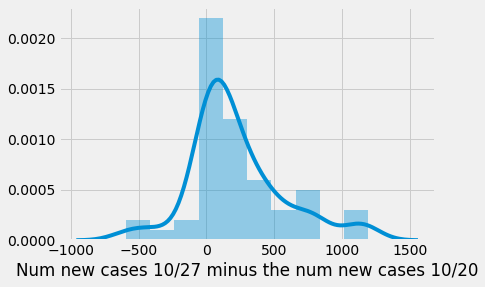

In [69]:
changeFromOneweekAgo = []

for state in dailyCasesStates.state.unique():
    lastWeek = dailyCasesStates.loc[ (dailyCasesStates.state==state) & (dailyCasesStates.date==20201020),:]
    thisWeek = dailyCasesStates.loc[ (dailyCasesStates.state==state) & (dailyCasesStates.date==20201027),:]
    
    change = float(thisWeek.positiveIncrease.values - lastWeek.positiveIncrease.values)
    changeFromOneweekAgo.append(change)

fig,ax = plt.subplots()
sns.distplot(changeFromOneweekAgo)

ax.set_xlabel("Num new cases 10/27 minus the num new cases 10/20")

meanChange = np.mean(changeFromOneweekAgo)
se = np.std(changeFromOneweekAgo)/ np.sqrt(len(changeFromOneweekAgo))

print("Mean Change {:.2f}".format(meanChange))
print("SE Change {:.2f}".format(se))

print("T = {:.2f}".format( meanChange/se ))

ttest, pvalue = scipy.stats.ttest_1samp( changeFromOneweekAgo, 0 )